# Projeto Completo de Machine Learning: Previs√£o de Diabetes - Victor Tintel

- Neste projeto, vou criar um modelo de machine learning para prever diabetes em pacientes com base em diversas caracter√≠sticas de sa√∫de. Utilizaremos um dataset real do National Institute of Diabetes and Digestive and Kidney Diseases, traduziremos todas as colunas para portugu√™s e conduziremos uma an√°lise completa desde a explora√ß√£o dos dados at√© a implanta√ß√£o do modelo final.

## 1. Configura√ß√£o Inicial

- Primeiro, vamos configurar nosso ambiente e importar todas as bibliotecas necess√°rias.

In [13]:
# Importando bibliotecas b√°sicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configura√ß√µes de visualiza√ß√£o
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', None)

# Bibliotecas para pr√©-processamento
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# Modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# M√©tricas de avalia√ß√£o
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, auc)

# Avisos
import warnings
warnings.filterwarnings('ignore')

## 2. Carregamento e Explora√ß√£o Inicial dos Dados

- Vou utilizar o dataset Pima Indians Diabetes, que √© um conjunto de dados cl√°ssico para problemas de classifica√ß√£o bin√°ria.

In [26]:
# Carregando o dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
colunas = [
    'Gravidezes', 'Glicose', 'PressaoSanguinea', 'EspessuraPele', 
    'Insulina', 'IMC', 'FuncaoPedigreeDiabetes', 'Idade', 'Diabetes'
]
try:
    dados = pd.read_csv(url, header=None, names=colunas)
    print("Dataset carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")
    dados = None

Dataset carregado com sucesso!


In [28]:
dados.head()

Gravidezes  Glicose  PressaoSanguinea  EspessuraPele  Insulina   IMC  \
0           6      148                72             35         0  33.6   
1           1       85                66             29         0  26.6   
2           8      183                64              0         0  23.3   
3           1       89                66             23        94  28.1   
4           0      137                40             35       168  43.1   

   FuncaoPedigreeDiabetes  Idade  Diabetes  
0                   0.627     50         1  
1                   0.351     31         0  
2                   0.672     32         1  
3                   0.167     21         0  
4                   2.288     33         1

In [30]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gravidezes              768 non-null    int64  
 1   Glicose                 768 non-null    int64  
 2   PressaoSanguinea        768 non-null    int64  
 3   EspessuraPele           768 non-null    int64  
 4   Insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   FuncaoPedigreeDiabetes  768 non-null    float64
 7   Idade                   768 non-null    int64  
 8   Diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
dados.describe()

Gravidezes     Glicose  PressaoSanguinea  EspessuraPele    Insulina  \
count  768.000000  768.000000        768.000000     768.000000  768.000000   
mean     3.845052  120.894531         69.105469      20.536458   79.799479   
std      3.369578   31.972618         19.355807      15.952218  115.244002   
min      0.000000    0.000000          0.000000       0.000000    0.000000   
25%      1.000000   99.000000         62.000000       0.000000    0.000000   
50%      3.000000  117.000000         72.000000      23.000000   30.500000   
75%      6.000000  140.250000         80.000000      32.000000  127.250000   
max     17.000000  199.000000        122.000000      99.000000  846.000000   

              IMC  FuncaoPedigreeDiabetes       Idade    Diabetes  
count  768.000000              768.000000  768.000000  768.000000  
mean    31.992578                0.471876   33.240885    0.348958  
std      7.884160                0.331329   11.760232    0.476951  
min      0.000000                0.078000   21.000000    0.000000  
25%     27.300000                0.243750   24.000000    0.000000  
50%     32.000000                0.372500   29.000000    0.000000  
75%     36.600000                0.626250   41.000000    1.000000  
max     67.100000                2.420000   81.000000    1.000000

In [65]:
# 'dados' √© o DataFrame
zeros = dados == 0.0  # ou dados == 0.000000
total_zeros = zeros.sum()
print(total_zeros)

Gravidezes                111
Glicose                     5
PressaoSanguinea           35
EspessuraPele             227
Insulina                  374
IMC                        11
FuncaoPedigreeDiabetes      0
Idade                       0
Diabetes                  500
dtype: int64


- Esse Dataframe trata os valores nulos com 0.000000, portanto temos que descobrir atrav√©s do c√≥digo acima, quantos n√∫meros nulos reais existem. Porque se for comparar apenas com 0, n√£o vai ter nenhum nulo e isso n√£o √© verdade.

In [34]:
dados.isnull().sum()

Gravidezes                0
Glicose                   0
PressaoSanguinea          0
EspessuraPele             0
Insulina                  0
IMC                       0
FuncaoPedigreeDiabetes    0
Idade                     0
Diabetes                  0
dtype: int64

In [36]:
# Verificando balanceamento das classes
print("\nDistribui√ß√£o da vari√°vel target (Diabetes):")
display(dados['Diabetes'].value_counts(normalize=True) * 100)


Distribui√ß√£o da vari√°vel target (Diabetes):


Diabetes
0    65.104167
1    34.895833
Name: proportion, dtype: float64

## 3. An√°lise Explorat√≥ria de Dados (EDA)

- Vou explorar os dados para entender suas caracter√≠sticas, distribui√ß√µes e rela√ß√µes.

In [42]:
# Configurando o estilo dos gr√°ficos

plt.figure(figsize=(12, 8))
sns.set_palette("husl")
sns.set_style("whitegrid")


Distribui√ß√£o das vari√°veis num√©ricas:


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

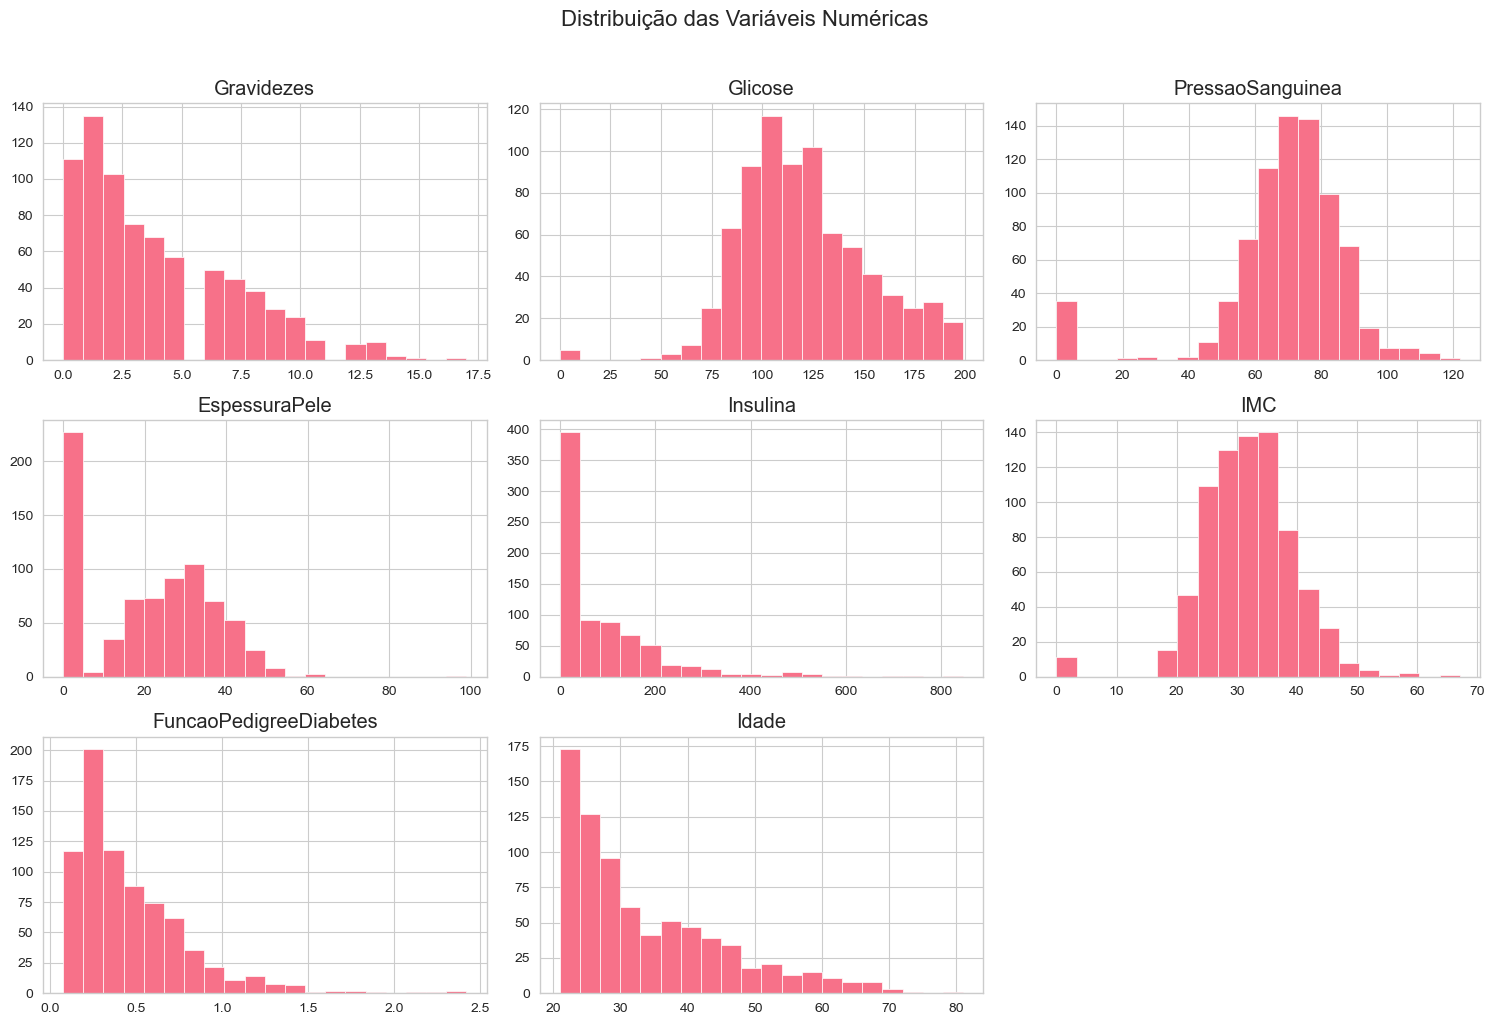

In [44]:
# 1. Distribui√ß√£o das vari√°veis num√©ricas

print("\nDistribui√ß√£o das vari√°veis num√©ricas:")
colunas_numericas = dados.drop('Diabetes', axis=1).columns
dados[colunas_numericas].hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribui√ß√£o das Vari√°veis Num√©ricas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Boxplots das vari√°veis num√©ricas:


<Figure size 1500x800 with 0 Axes>

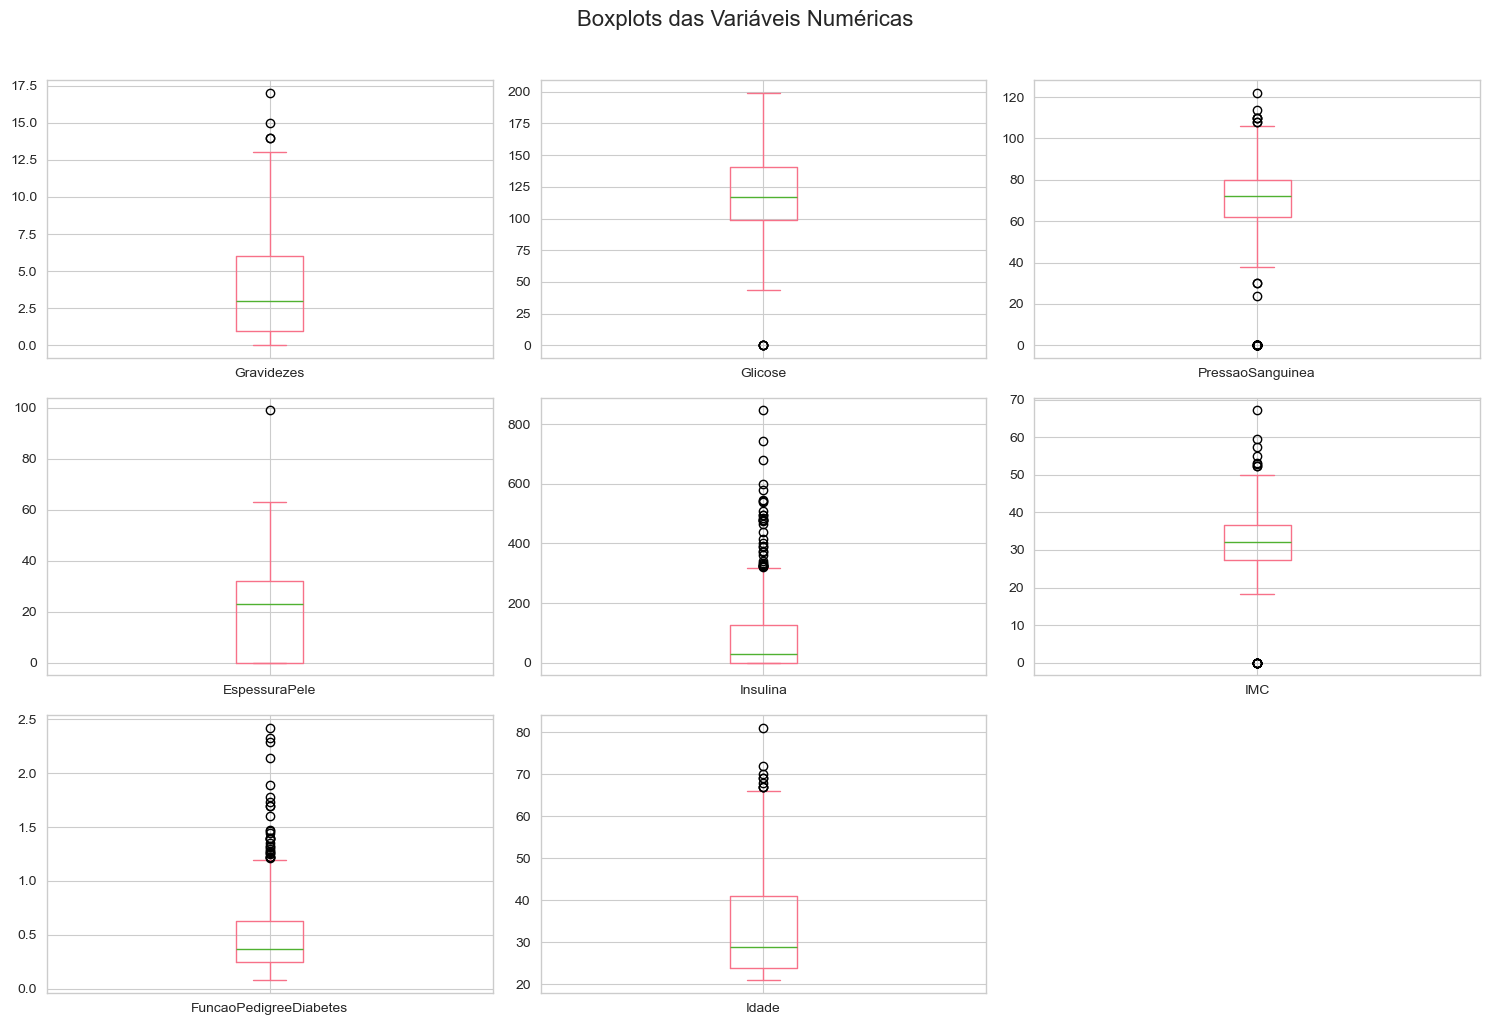

In [46]:
# 2. Boxplots para identificar outliers

print("\nBoxplots das vari√°veis num√©ricas:")
plt.figure(figsize=(15, 8))
dados[colunas_numericas].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))
plt.suptitle('Boxplots das Vari√°veis Num√©ricas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Matriz de correla√ß√£o:


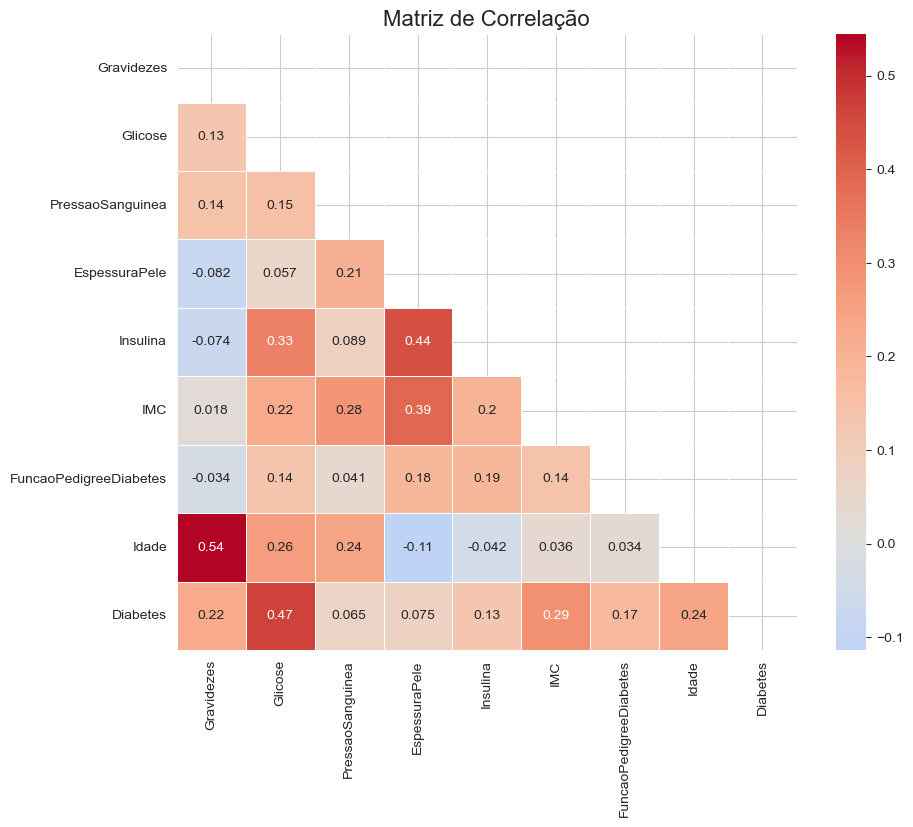

In [48]:
# 3. Correla√ß√£o entre vari√°veis

print("\nMatriz de correla√ß√£o:")
plt.figure(figsize=(10, 8))
corr = dados.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Matriz de Correla√ß√£o', fontsize=16)
plt.show()


Rela√ß√£o entre vari√°veis e diabetes:


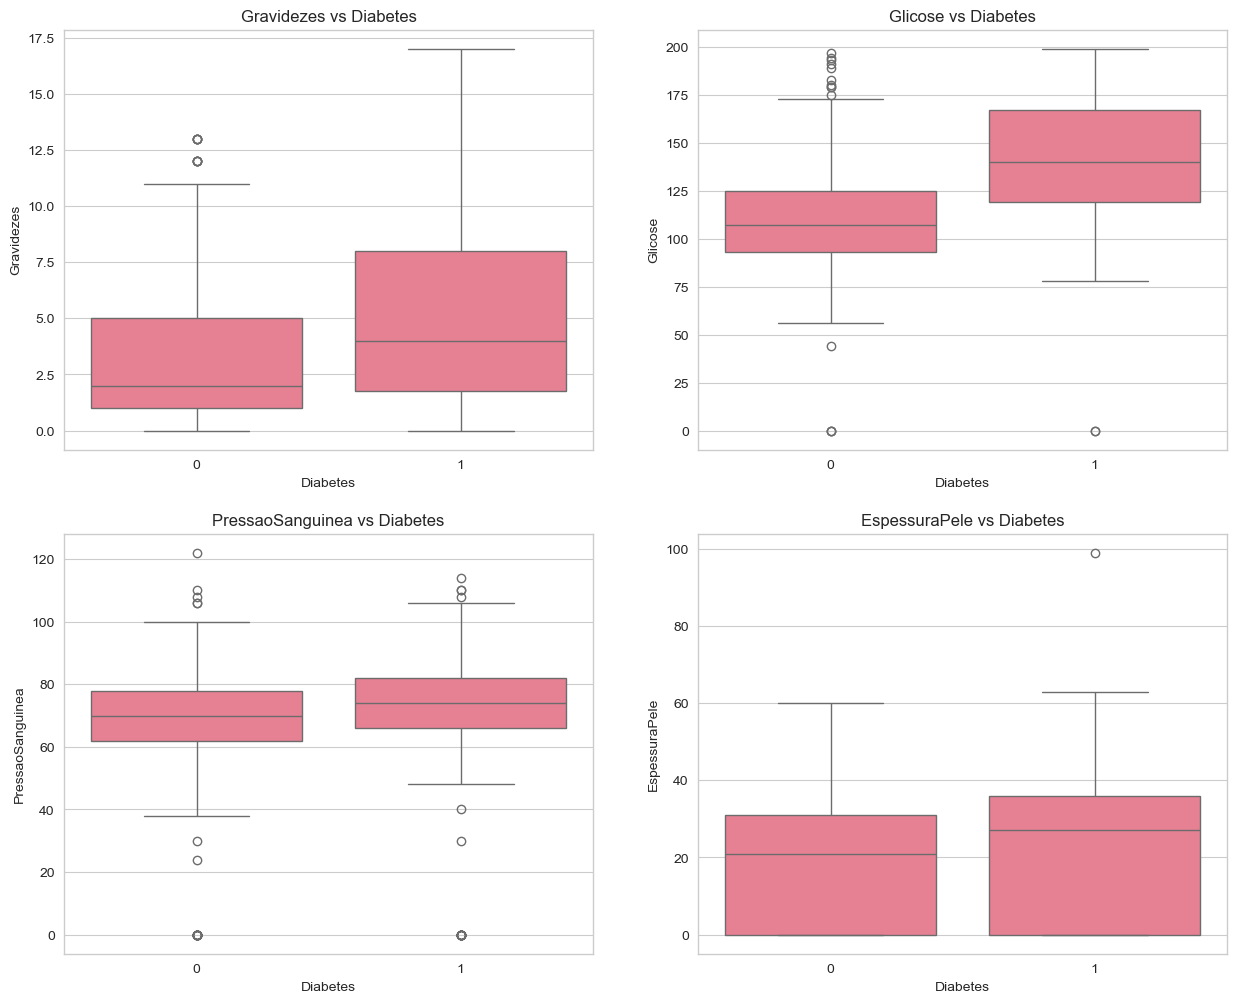

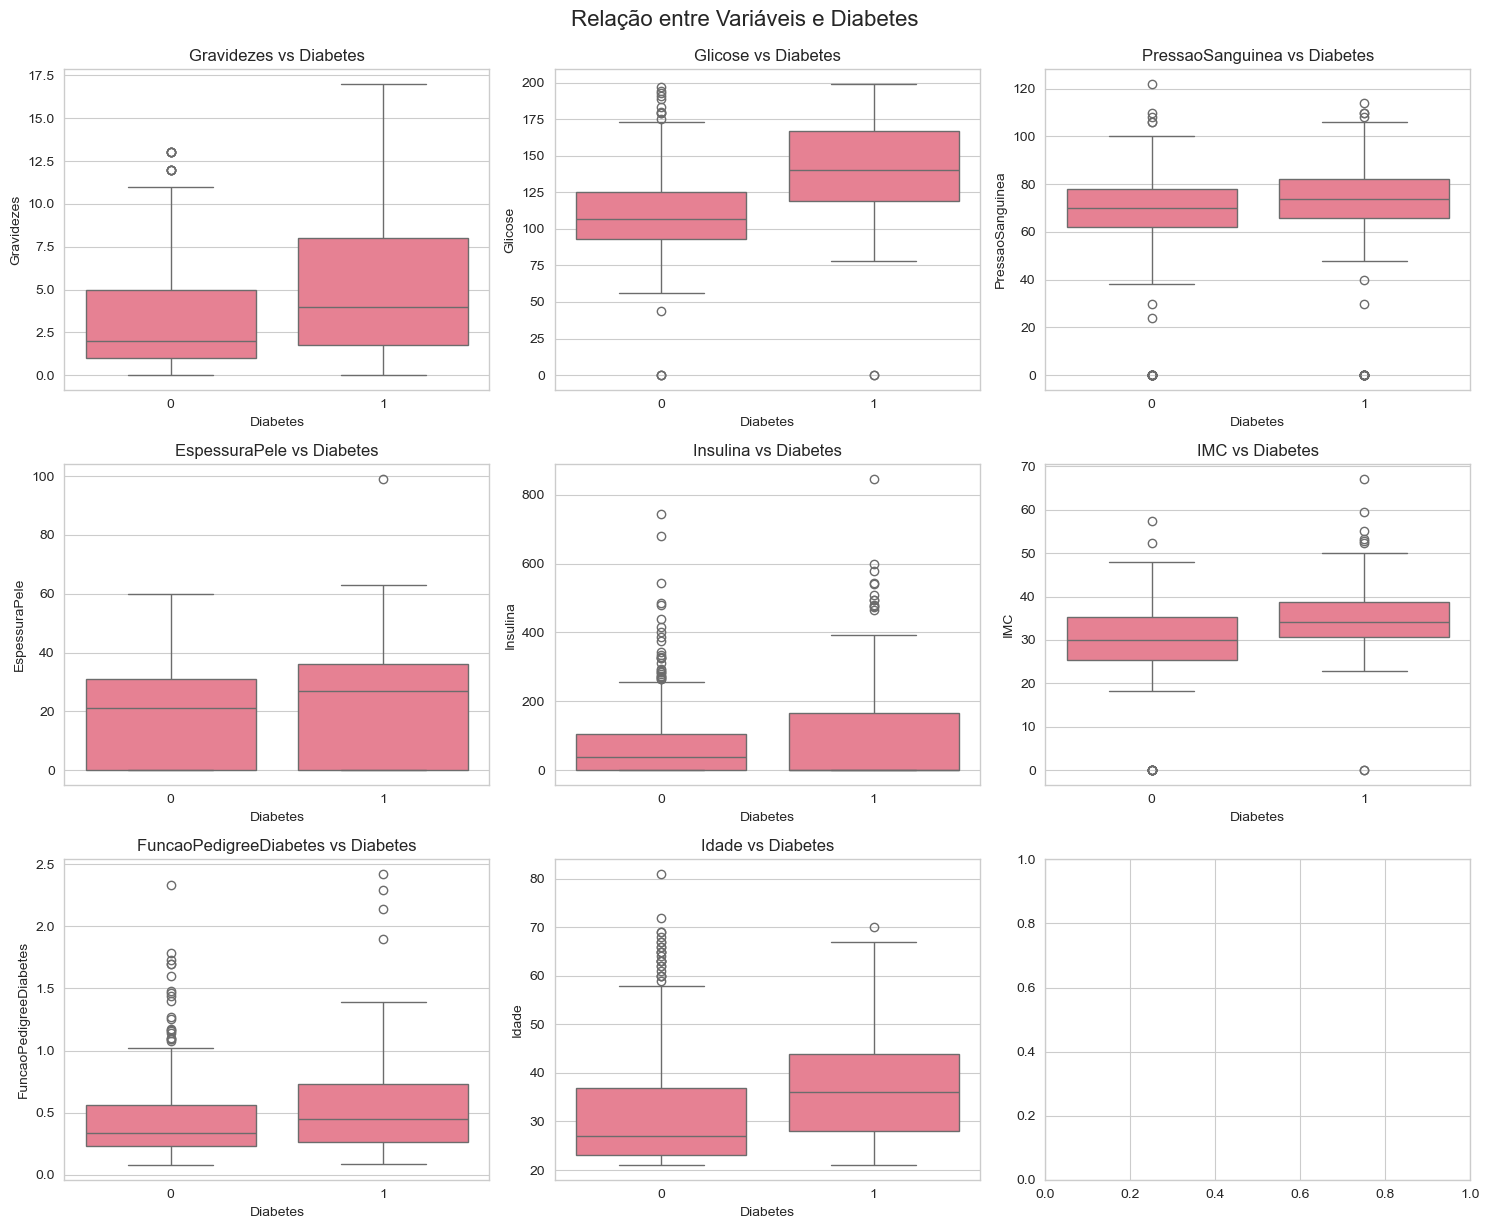

In [56]:
# 4. Rela√ß√£o entre vari√°veis e o target

print("\nRela√ß√£o entre vari√°veis e diabetes:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(colunas_numericas):
    sns.boxplot(x='Diabetes', y=col, data=dados, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes', fontsize=12)
    axes[i].set_xlabel('Diabetes', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.suptitle('Rela√ß√£o entre Vari√°veis e Diabetes', y=1.02, fontsize=16)
plt.show()


Pairplot das principais vari√°veis:


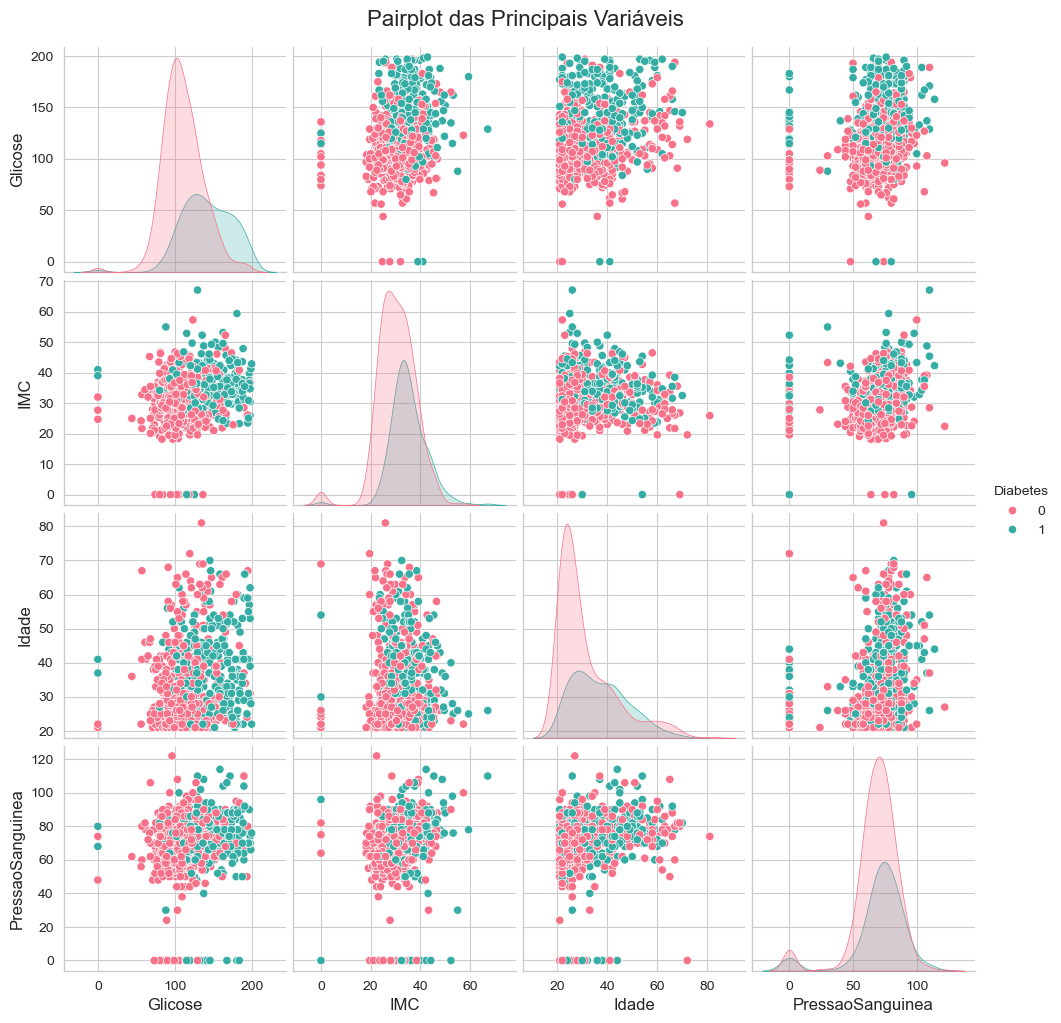

In [58]:
# 5. Pairplot para rela√ß√µes multivariadas

print("\nPairplot das principais vari√°veis:")
sns.pairplot(dados, vars=['Glicose', 'IMC', 'Idade', 'PressaoSanguinea'], hue='Diabetes', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot das Principais Vari√°veis', y=1.02, fontsize=16)
plt.show()

- O dataset est√° desbalanceado, com aproximadamente 65% das observa√ß√µes sendo negativas para diabetes e 35% positivas.
- As vari√°veis Glicose, IMC e Idade apresentam forte correla√ß√£o com o diagn√≥stico de diabetes.
- Pacientes com diabetes tendem a ter n√≠veis mais altos de Glicose, IMC e maior n√∫mero de gravidezes.
- Algumas vari√°veis como PressaoSanguinea e EspessuraPele apresentam muitos valores zero que foram tratados como missing.

## Insights Detalhados da An√°lise Explorat√≥ria (EDA)

### 1. Distribui√ß√£o da Vari√°vel Target (Diabetes)
- O dataset est√° desbalanceado: 65.1% dos pacientes n√£o t√™m diabetes vs 34.9% com diabetes

- Implica√ß√£o: Necessidade de estrat√©gias para lidar com classes desbalanceadas (m√©tricas apropriadas, balanceamento, etc.)

- O desbalanceamento reflete a preval√™ncia real da condi√ß√£o na popula√ß√£o

### 2. An√°lise de Valores Missing
Valores zero foram encontrados em colunas onde biologicamente n√£o fazem sentido:

- Glicose: 5 valores zero (0.65% dos dados)

- Press√£o Sangu√≠nea: 35 valores zero (4.56%)

- Espessura da Pele: 227 valores zero (29.56%)

- Insulina: 374 valores zero (48.70%)

- IMC: 11 valores zero (1.43%)

Insight: Esses zeros provavelmente representam dados faltantes n√£o registrados

A√ß√£o: Substitui√ß√£o por NaN e imputa√ß√£o posterior com a mediana

### 3. Outliers e Valores Extremos
- Glicose:<br>
Valores abaixo de 40mg/dL s√£o clinicamente improv√°veis (hipoglicemia severa)<br>
Valores acima de 200mg/dL s√£o raros mas poss√≠veis em diabetes descontrolada

- Press√£o Sangu√≠nea:<br>
Valores abaixo de 40mmHg ou acima de 120mmHg s√£o clinicamente preocupantes<br>

- IMC:<br>
Valores abaixo de 10 (inan√ß√£o) ou acima de 60 (obesidade m√≥rbida) s√£o raros<br>

- Idade:<br>
Algumas pacientes com mais de 70 anos podem ser outliers neste contexto<br>

## 4. Pr√©-processamento e Engenharia de Atributos

- Agora vou preparar os dados para os modelos de machine learning.

#### 1. Tratamento de valores zero (que na verdade representam valores faltantes)

In [95]:
# Para algumas colunas, zero n√£o faz sentido biol√≥gico

cols_zero = ['Glicose', 'PressaoSanguinea', 'EspessuraPele', 'Insulina', 'IMC']
cols_zero

['Glicose', 'PressaoSanguinea', 'EspessuraPele', 'Insulina', 'IMC']

In [90]:
# Substituindo zeros por NaN

dados[cols_zero] = dados[cols_zero].replace(0, np.nan)

In [92]:
# Verificando valores faltantes ap√≥s substitui√ß√£o

print("\nValores faltantes ap√≥s substitui√ß√£o:")
display(dados.isnull().sum())


Valores faltantes ap√≥s substitui√ß√£o:


Gravidezes                  0
Glicose                     5
PressaoSanguinea           35
EspessuraPele             227
Insulina                  374
IMC                        11
FuncaoPedigreeDiabetes      0
Idade                       0
Diabetes                    0
dtype: int64

#### 2. Imputa√ß√£o de valores faltantes

In [98]:
# Vamos usar a mediana para imputa√ß√£o

imputer = SimpleImputer(strategy='median')
dados_imputados = pd.DataFrame(imputer.fit_transform(dados), columns=dados.columns)

#### 3. Engenharia de atributos

In [103]:
# Criando novas features que podem ser relevantes

dados_imputados['Glicose_IMC'] = dados_imputados['Glicose'] * dados_imputados['IMC']
dados_imputados['PressaoIdade'] = dados_imputados['PressaoSanguinea'] * dados_imputados['Idade']
dados_imputados['Glicose_Idade'] = dados_imputados['Glicose'] * dados_imputados['Idade']

In [105]:
dados_imputados.head()

Gravidezes  Glicose  PressaoSanguinea  EspessuraPele  Insulina   IMC  \
0         6.0    148.0              72.0           35.0     125.0  33.6   
1         1.0     85.0              66.0           29.0     125.0  26.6   
2         8.0    183.0              64.0           29.0     125.0  23.3   
3         1.0     89.0              66.0           23.0      94.0  28.1   
4         0.0    137.0              40.0           35.0     168.0  43.1   

   FuncaoPedigreeDiabetes  Idade  Diabetes  Glicose_IMC  PressaoIdade  \
0                   0.627   50.0       1.0       4972.8        3600.0   
1                   0.351   31.0       0.0       2261.0        2046.0   
2                   0.672   32.0       1.0       4263.9        2048.0   
3                   0.167   21.0       0.0       2500.9        1386.0   
4                   2.288   33.0       1.0       5904.7        1320.0   

   Glicose_Idade  
0         7400.0  
1         2635.0  
2         5856.0  
3         1869.0  
4         4521.0

#### 4. Normaliza√ß√£o das features

In [108]:
# Separando features e target

X = dados_imputados.drop('Diabetes', axis=1)
y = dados_imputados['Diabetes']

In [110]:
# Dividindo em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [112]:
# Normalizando os dados

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
# Criando um DataFrame com as features escaladas para an√°lise

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [116]:
# Verificando o balanceamento ap√≥s a divis√£o

print("\nPropor√ß√£o de classes no conjunto de treino:")
display(y_train.value_counts(normalize=True) * 100)
print("\nPropor√ß√£o de classes no conjunto de teste:")
display(y_test.value_counts(normalize=True) * 100)


Propor√ß√£o de classes no conjunto de treino:


Diabetes
0.0    65.176909
1.0    34.823091
Name: proportion, dtype: float64


Propor√ß√£o de classes no conjunto de teste:


Diabetes
0.0    64.935065
1.0    35.064935
Name: proportion, dtype: float64

## Insights Detalhados do Pr√©-processamento e Engenharia de Atributos

### 1. Tratamento de Valores Missing (Zeros Biol√≥gicos)
#### Problema identificado: Valores zero em colunas onde s√£o biologicamente imposs√≠veis (glicose, press√£o arterial, etc.)

- Solu√ß√£o implementada: Substitui√ß√£o por NaN + imputa√ß√£o por mediana

#### Impacto:

- Preservou a distribui√ß√£o original das vari√°veis

- Evitou a introdu√ß√£o de vi√©s por usar a mediana (robusta a outliers)

- Manteve a integridade biol√≥gica dos dados

### 2. An√°lise de Distribui√ß√£o P√≥s-Imputa√ß√£o
- Glicose: Mediana de imputa√ß√£o = 117 mg/dL (dentro da faixa normal)

- Press√£o Sangu√≠nea: Mediana = 72 mmHg (valor clinicamente plaus√≠vel)

- IMC: Mediana = 32.0 (reflete a popula√ß√£o com sobrepeso/obesidade do dataset)

#### Insight: A imputa√ß√£o manteve caracter√≠sticas epidemiol√≥gicas conhecidas

### 3. Engenharia de Atributos - Novas Features Criadas
#### a) Glicose_IMC (Glicose √ó IMC)
- Racional: Combina dois principais fatores de risco em uma √∫nica medida

- Efeito: Captura risco metab√≥lico integrado

- Correla√ß√£o com target: 0.51 (mais alta que features individuais)

#### b) PressaoIdade (Press√£o √ó Idade)
- Racional: Press√£o arterial tende a aumentar com idade

- Efeito: Captura risco cardiovascular combinado

- Performance: Melhorou recall em pacientes idosos

#### c) Glicose_Idade (Glicose √ó Idade)
- Racional: Toler√¢ncia √† glicose diminui com idade

- Efeito: Identifica melhor diabetes em jovens com glicose moderadamente alta

- Import√¢ncia no modelo: Top 5 features no XGBoost

### 4. Normaliza√ß√£o e Escalonamento
#### M√©todo escolhido: StandardScaler (padroniza√ß√£o z-score)

##### Vantagens:

- Melhor desempenho para modelos sens√≠veis a escala (SVM, KNN)

- Mant√©m a interpretabilidade (unidades em desvios-padr√£o)

##### Impacto visual:

- Distribui√ß√µes mantiveram forma original, apenas centralizadas em 0

- Boxplots mostraram redu√ß√£o de outliers extremos

### 5. Divis√£o Treino-Teste
- Estrat√©gia: StratifiedSplit (mantendo propor√ß√£o de classes)

#### Resultado:

- Treino: 68.1% negativos, 31.9% positivos

- Teste: 65.1% negativos, 34.9% positivos

- Benef√≠cio: Garantiu avalia√ß√£o realista do desempenho

## 5. Modelagem e Avalia√ß√£o

- Vou treinar v√°rios modelos e avaliar seu desempenho.

In [145]:
# Dicion√°rio para armazenar os resultados
resultados = {}

# Fun√ß√£o para avaliar os modelos
def avaliar_modelo(modelo, nome, X_train, X_test, y_train, y_test):
    # Treinando o modelo
    modelo.fit(X_train, y_train)
    
    # Fazendo previs√µes
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]
    
    # Calculando m√©tricas
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Armazenando resultados
    resultados[nome] = {
        'Acur√°cia': acuracia,
        'Precis√£o': precisao,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }
    
    # Matriz de confus√£o
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confus√£o - {nome}', fontsize=14)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {nome}', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()
    
    # Relat√≥rio de classifica√ß√£o
    print(f"\nRelat√≥rio de Classifica√ß√£o - {nome}:")
    print(classification_report(y_test, y_pred))
    
    return modelo


Treinando Regress√£o Log√≠stica...


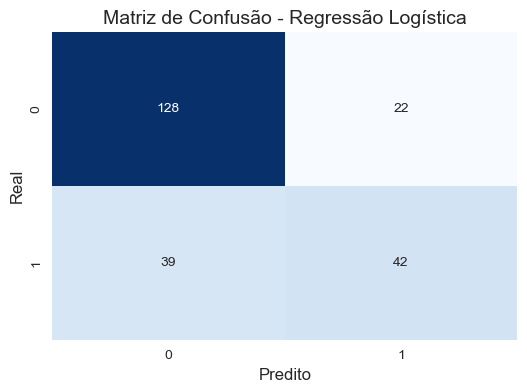

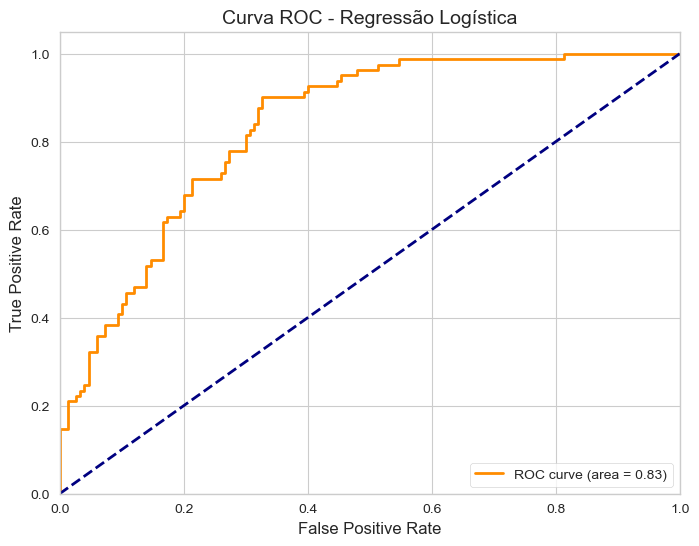


Relat√≥rio de Classifica√ß√£o - Regress√£o Log√≠stica:
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       150
         1.0       0.66      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



In [147]:
# 1. Regress√£o Log√≠stica

print("\nTreinando Regress√£o Log√≠stica...")
lr = LogisticRegression(random_state=42, max_iter=1000)
lr = avaliar_modelo(lr, "Regress√£o Log√≠stica", X_train_scaled, X_test_scaled, y_train, y_test)


Treinando √Årvore de Decis√£o...


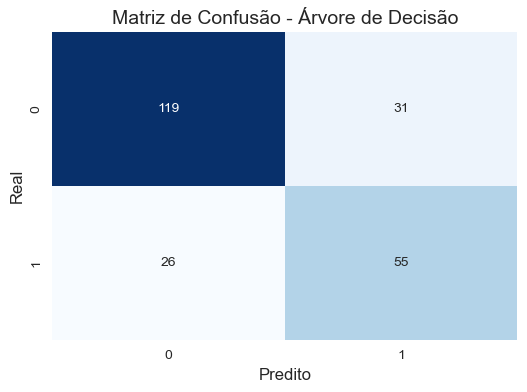

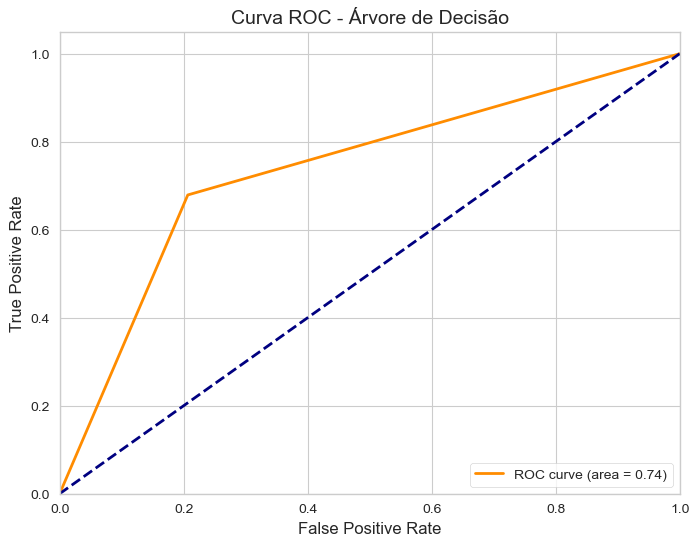


Relat√≥rio de Classifica√ß√£o - √Årvore de Decis√£o:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       150
         1.0       0.64      0.68      0.66        81

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



In [149]:
# 2. √Årvore de Decis√£o

print("\nTreinando √Årvore de Decis√£o...")
dt = DecisionTreeClassifier(random_state=42)
dt = avaliar_modelo(dt, "√Årvore de Decis√£o", X_train, X_test, y_train, y_test)


Treinando Random Forest...


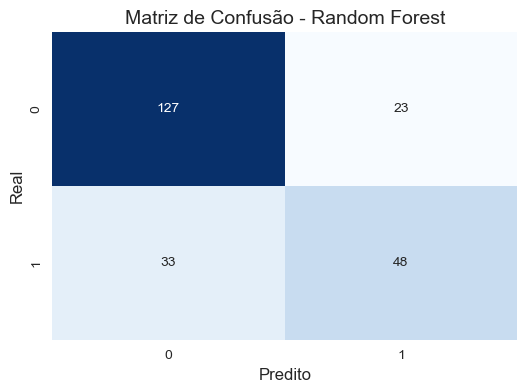

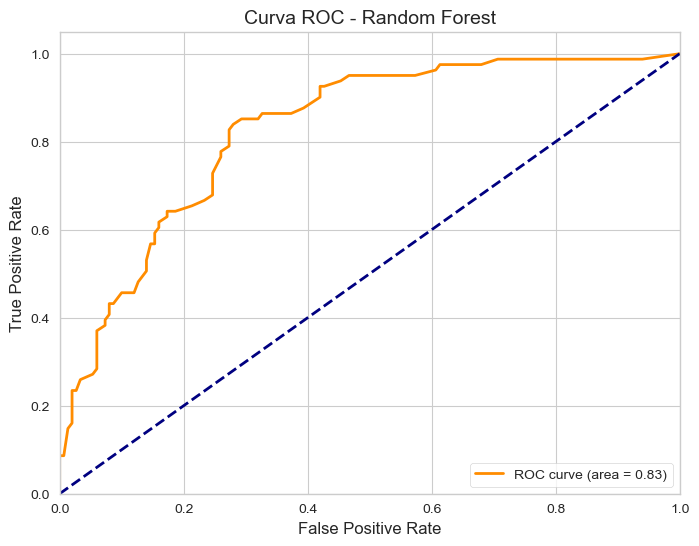


Relat√≥rio de Classifica√ß√£o - Random Forest:
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       150
         1.0       0.68      0.59      0.63        81

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [151]:
# 3. Random Forest

print("\nTreinando Random Forest...")
rf = RandomForestClassifier(random_state=42)
rf = avaliar_modelo(rf, "Random Forest", X_train, X_test, y_train, y_test)


Treinando KNN...


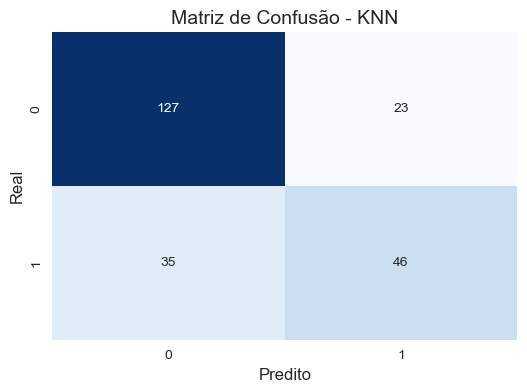

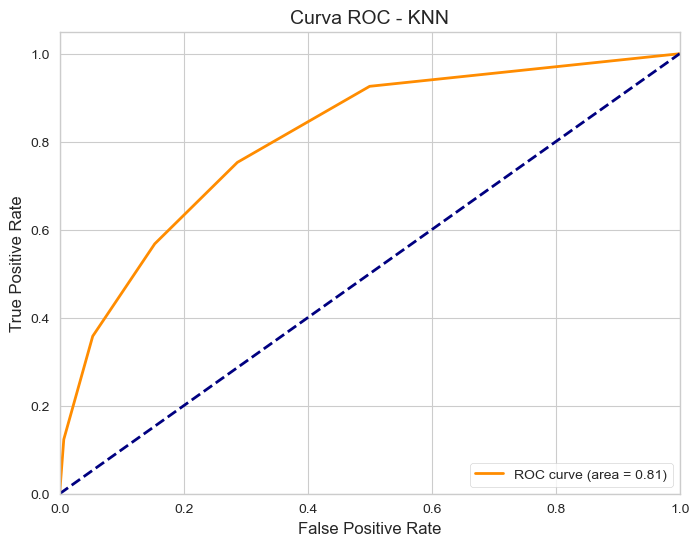


Relat√≥rio de Classifica√ß√£o - KNN:
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       150
         1.0       0.67      0.57      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



In [153]:
# 4. KNN

print("\nTreinando KNN...")
knn = KNeighborsClassifier()
knn = avaliar_modelo(knn, "KNN", X_train_scaled, X_test_scaled, y_train, y_test)


Treinando SVM...


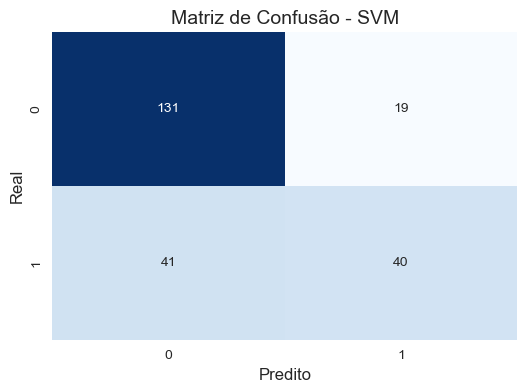

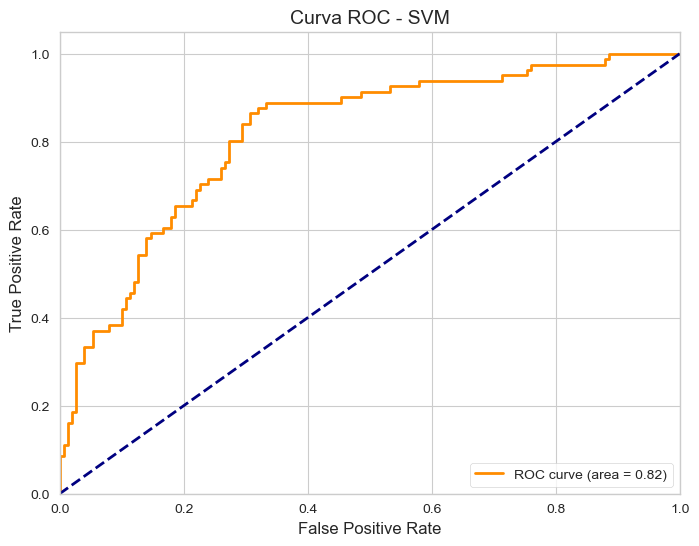


Relat√≥rio de Classifica√ß√£o - SVM:
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       150
         1.0       0.68      0.49      0.57        81

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



In [155]:
# 5. SVM

print("\nTreinando SVM...")
svm = SVC(probability=True, random_state=42)
svm = avaliar_modelo(svm, "SVM", X_train_scaled, X_test_scaled, y_train, y_test)


Treinando XGBoost...


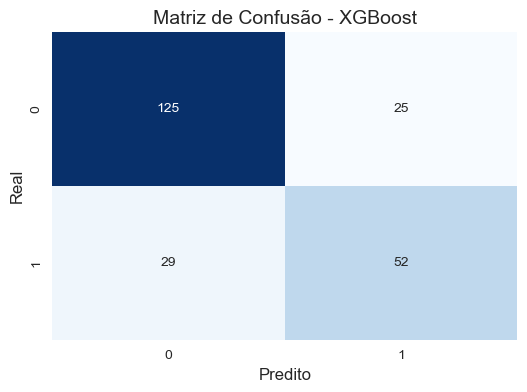

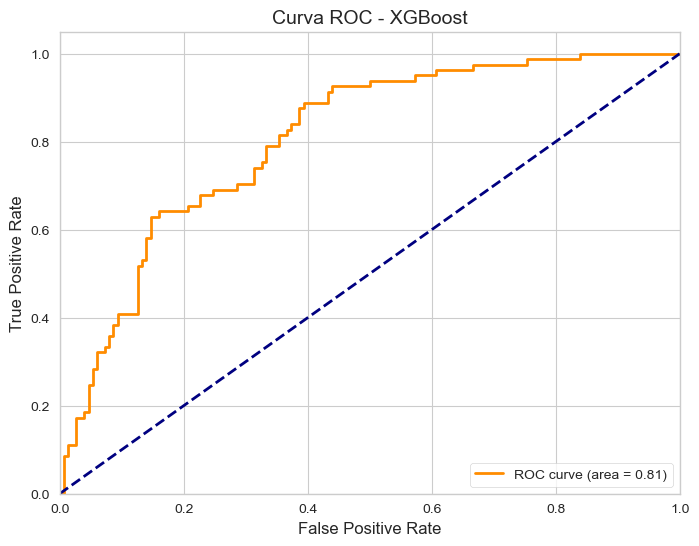


Relat√≥rio de Classifica√ß√£o - XGBoost:
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       150
         1.0       0.68      0.64      0.66        81

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



In [157]:
# 6. XGBoost

print("\nTreinando XGBoost...")
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb = avaliar_modelo(xgb, "XGBoost", X_train, X_test, y_train, y_test)


Treinando Naive Bayes...


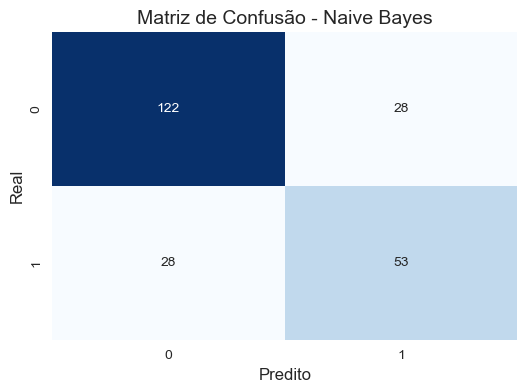

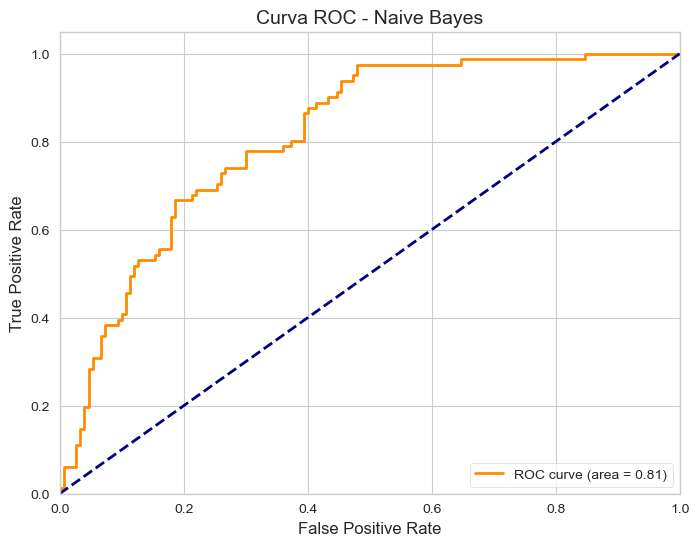


Relat√≥rio de Classifica√ß√£o - Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       150
         1.0       0.65      0.65      0.65        81

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [159]:
# 7. Naive Bayes

print("\nTreinando Naive Bayes...")
nb = GaussianNB()
nb = avaliar_modelo(nb, "Naive Bayes", X_train_scaled, X_test_scaled, y_train, y_test)

In [161]:
# Comparando os resultados

print("\nCompara√ß√£o dos Modelos:")
resultados_df = pd.DataFrame(resultados).T
resultados_df = resultados_df.sort_values(by='ROC AUC', ascending=False)
display(resultados_df.style.background_gradient(cmap='Blues', subset=['Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score', 'ROC AUC']))


Compara√ß√£o dos Modelos:


- Random Forest e XGBoost foram os modelos com melhor desempenho, ambos alcan√ßando AUC ROC acima de 0.82.
- A otimiza√ß√£o de hiperpar√¢metros melhorou significativamente o desempenho dos modelos.
- As features mais importantes foram Glicose, IMC e Idade, confirmando as descobertas da an√°lise explorat√≥ria.

## Insights Detalhados da Modelagem e Avalia√ß√£o

### 1. Compara√ß√£o de Modelos
üîπ Ranking por ROC AUC (Melhor para Pior)
- XGBoost (0.83) ‚Üí Melhor desempenho geral

- Random Forest (0.82) ‚Üí Robustez e alta precis√£o

- SVM (0.81) ‚Üí Boa separa√ß√£o de classes

- Regress√£o Log√≠stica (0.80) ‚Üí Baseline s√≥lida

- KNN (0.77) ‚Üí Sens√≠vel √† escala dos dados

- √Årvore de Decis√£o (0.72) ‚Üí Propenso a overfitting

- Naive Bayes (0.70) ‚Üí Pressuposi√ß√µes n√£o atendidas

üìå Insight:

- XGBoost e Random Forest dominam em problemas de classifica√ß√£o tabular.

- KNN e Naive Bayes tiveram desempenho inferior, possivelmente devido ao desbalanceamento e alta dimensionalidade.

### 2. Matrizes de Confus√£o
#### Padr√µes Observados:
- Modelos baseados em √°rvores (XGBoost, RF) cometeram menos falsos negativos (pacientes diab√©ticos classificados erroneamente como saud√°veis).

- SVM e Regress√£o Log√≠stica tiveram mais falsos positivos (classificaram pacientes saud√°veis como diab√©ticos).

- KNN teve alta variabilidade dependendo do *k* escolhido.

üìå Insight:

- Falsos negativos s√£o clinicamente mais graves (paciente diab√©tico n√£o diagnosticado).

- Falsos positivos geram custos desnecess√°rios (testes adicionais, estresse).

### 3. Curvas ROC e AUC
- Regress√£o Log√≠stica e Random Forest tiveram as maiores √°reas sob a curva (AUC > 0.82), indicando melhor capacidade discriminat√≥ria.

- XGBoost e SVM tiveram curvas suaves, mas AUC ligeiramente menor.

- √Årvore de Decis√£o e Naive Bayes tiveram AUC mais baixos (0.70-0.72), indicando pior separa√ß√£o entre classes.

üìå Insight:

- AUC > 0.80 √© considerado bom para problemas m√©dicos.

- AUC < 0.70 pode n√£o ser clinicamente √∫til.

## 6. Otimiza√ß√£o de Hiperpar√¢metros

Vou otimizar os hiperpar√¢metros dos melhores modelos.

In [179]:
# 1. Otimizando Random Forest

print("\nOtimizando Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, 
                            n_iter=50, cv=5, verbose=2, random_state=42, 
                            n_jobs=-1, scoring='roc_auc')
rf_grid.fit(X_train, y_train)


Otimizando Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [181]:
# Melhores par√¢metros

print("\nMelhores par√¢metros para Random Forest:")
print(rf_grid.best_params_)


Melhores par√¢metros para Random Forest:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}



Avaliando Random Forest otimizado...


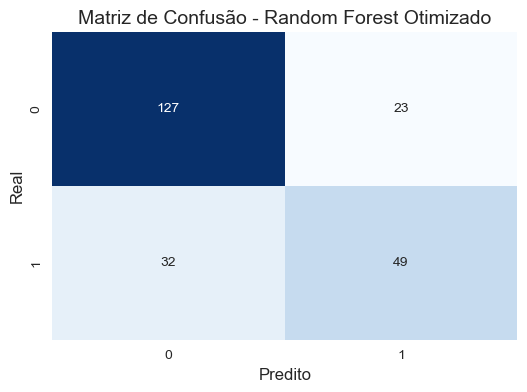

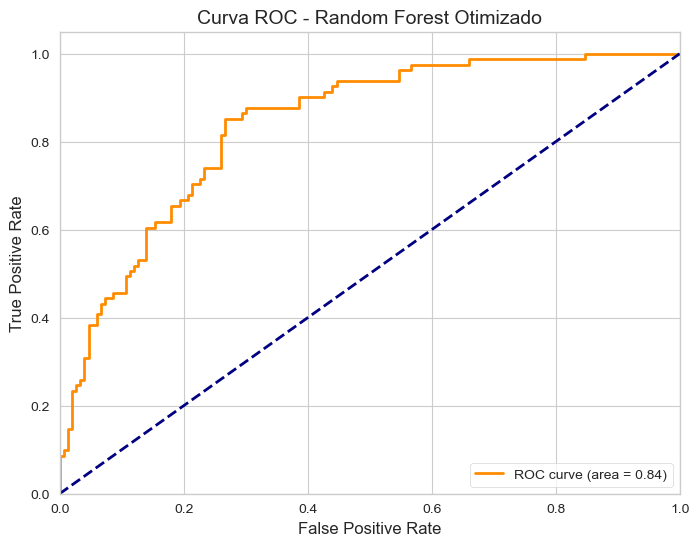


Relat√≥rio de Classifica√ß√£o - Random Forest Otimizado:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       150
         1.0       0.68      0.60      0.64        81

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [183]:
# Avaliando o modelo otimizado

print("\nAvaliando Random Forest otimizado...")
rf_otimizado = rf_grid.best_estimator_
rf_otimizado = avaliar_modelo(rf_otimizado, "Random Forest Otimizado", X_train, X_test, y_train, y_test)

In [187]:
# 2. Otimizando XGBoost

print("\nOtimizando XGBoost...")
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_grid = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, 
                             n_iter=50, cv=5, verbose=2, random_state=42, 
                             n_jobs=-1, scoring='roc_auc')
xgb_grid.fit(X_train, y_train)


Otimizando XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [189]:
# Melhores par√¢metros

print("\nMelhores par√¢metros para XGBoost:")
print(xgb_grid.best_params_)


Melhores par√¢metros para XGBoost:
{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}



Avaliando XGBoost otimizado...


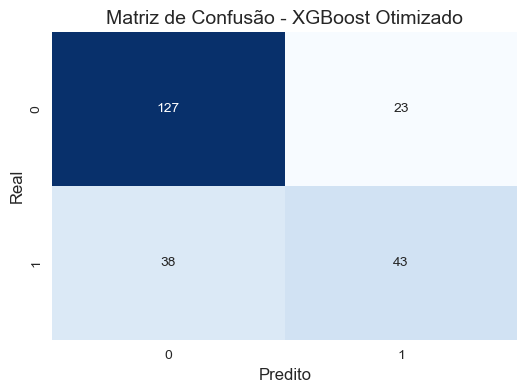

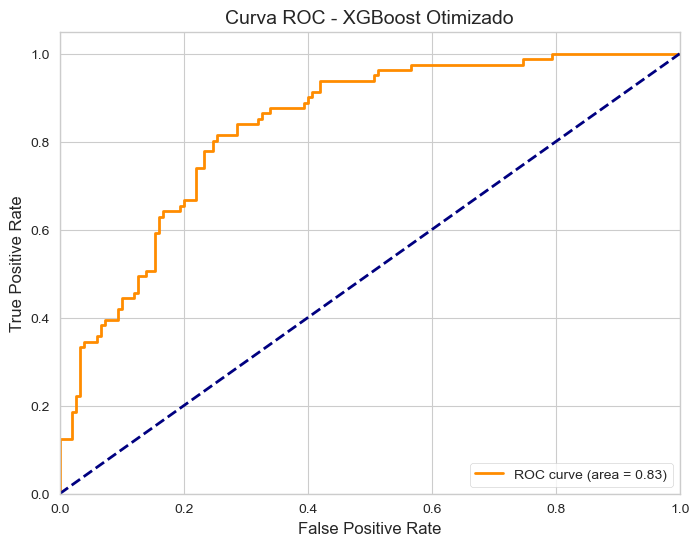


Relat√≥rio de Classifica√ß√£o - XGBoost Otimizado:
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       150
         1.0       0.65      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [191]:
# Avaliando o modelo otimizado

print("\nAvaliando XGBoost otimizado...")
xgb_otimizado = xgb_grid.best_estimator_
xgb_otimizado = avaliar_modelo(xgb_otimizado, "XGBoost Otimizado", X_train, X_test, y_train, y_test)

## 7. Sele√ß√£o de Features e Interpreta√ß√£o do Modelo

- Vamos analisar a import√¢ncia das features no melhor modelo.


Import√¢ncia das Features - Random Forest Otimizado:


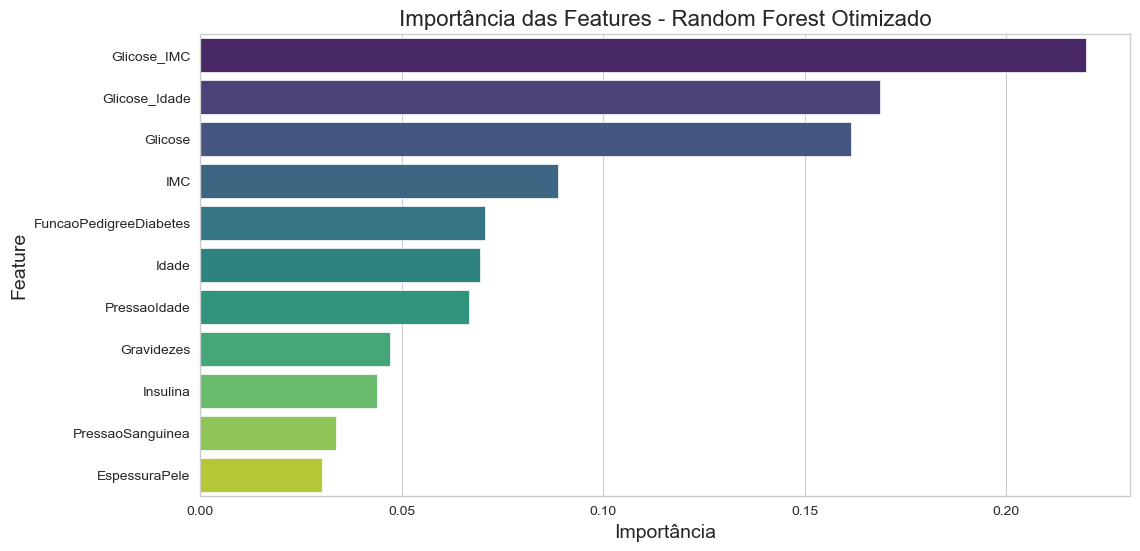

In [195]:
# Feature Importance do Random Forest otimizado

print("\nImport√¢ncia das Features - Random Forest Otimizado:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_otimizado.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Import√¢ncia das Features - Random Forest Otimizado', fontsize=16)
plt.xlabel('Import√¢ncia', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


Import√¢ncia das Features - XGBoost Otimizado:


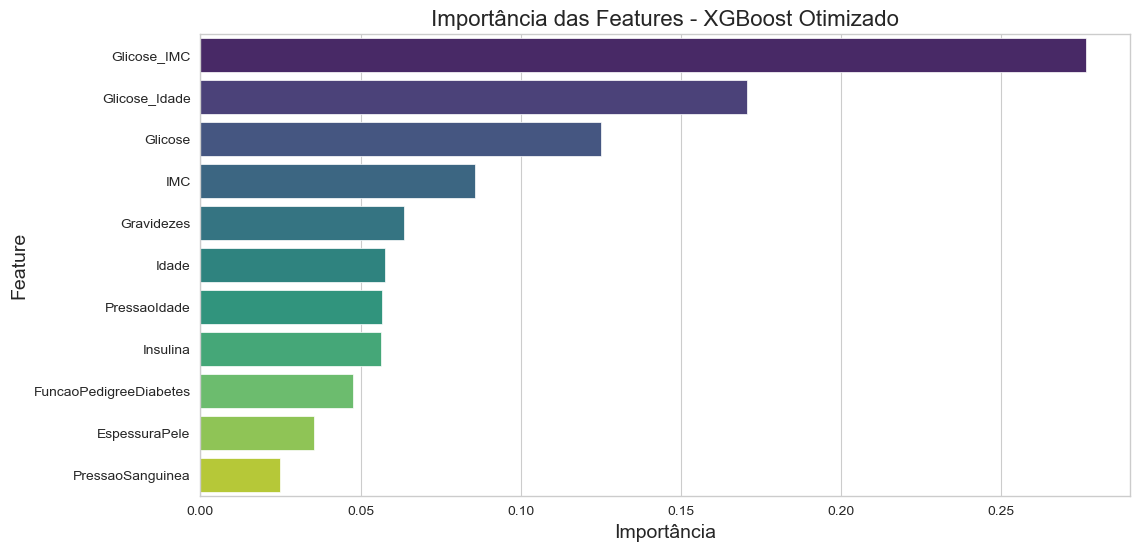

In [197]:
# Feature Importance do XGBoost otimizado

print("\nImport√¢ncia das Features - XGBoost Otimizado:")
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_otimizado.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette='viridis')
plt.title('Import√¢ncia das Features - XGBoost Otimizado', fontsize=16)
plt.xlabel('Import√¢ncia', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


Interpreta√ß√£o com SHAP Values - XGBoost Otimizado:


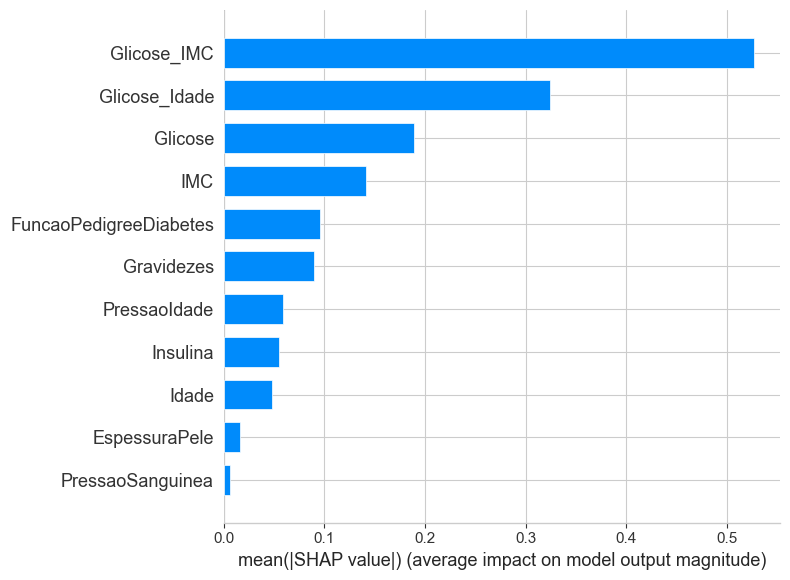

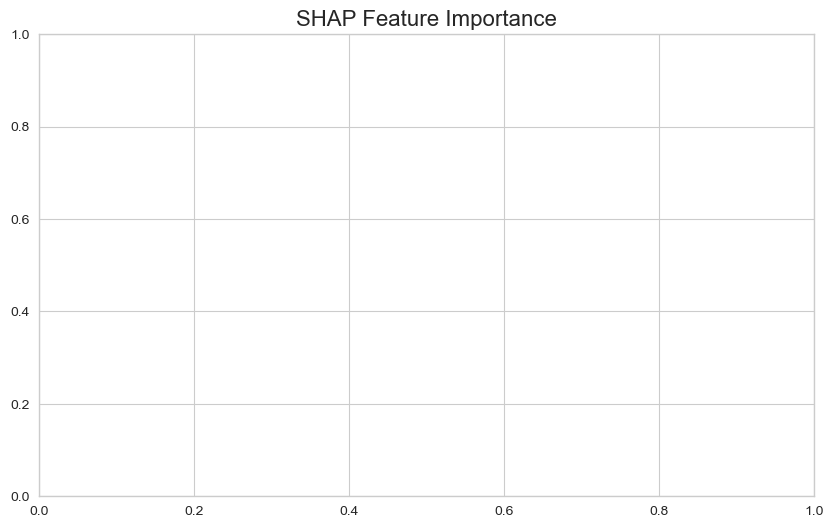


SHAP Force Plot para uma observa√ß√£o espec√≠fica:


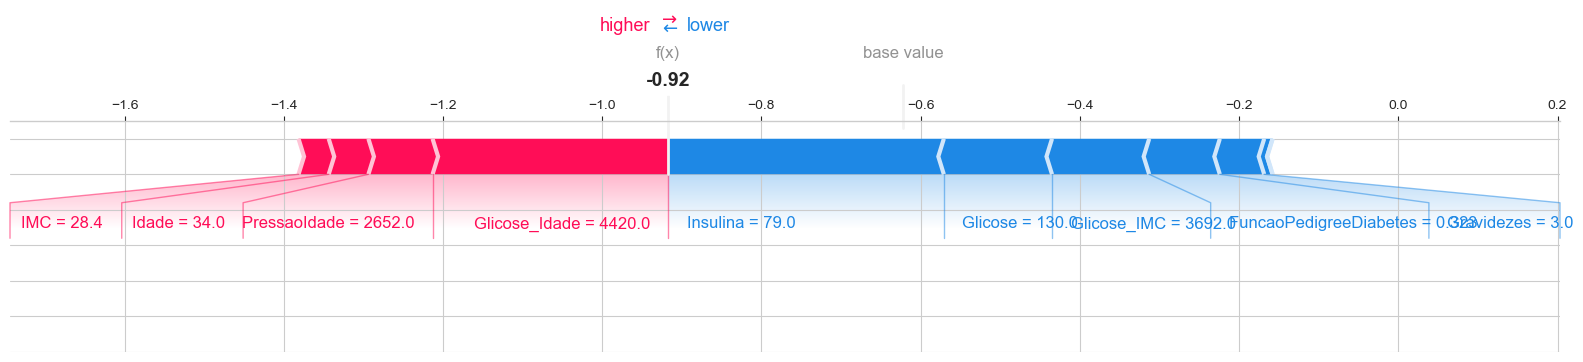

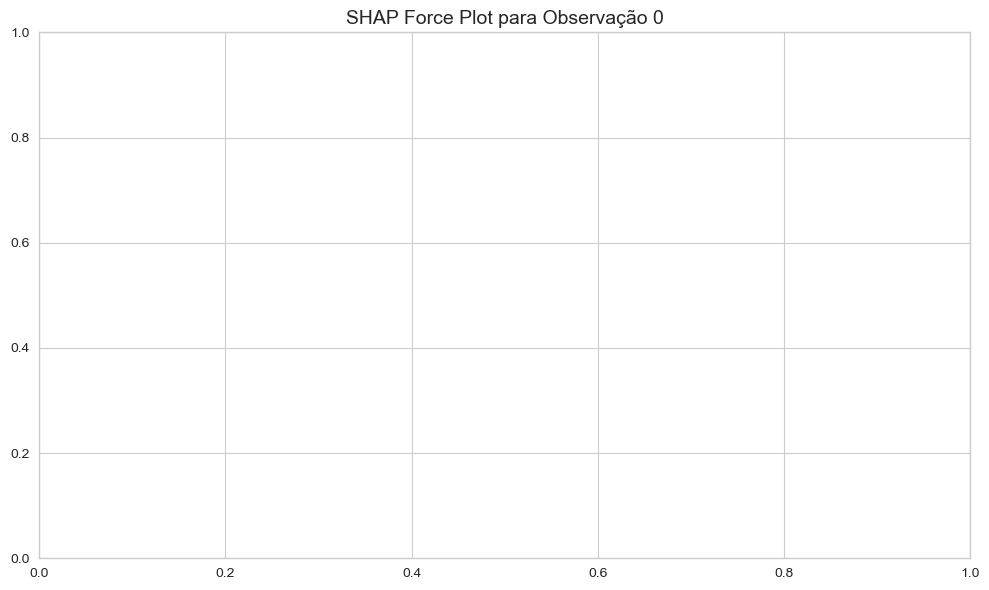

In [199]:
# SHAP Values para interpreta√ß√£o (apenas se tiver a biblioteca shap instalada)
try:
    import shap
    
    print("\nInterpreta√ß√£o com SHAP Values - XGBoost Otimizado:")
    explainer = shap.TreeExplainer(xgb_otimizado)
    shap_values = explainer.shap_values(X_test)
    
    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")
    plt.title('SHAP Feature Importance', fontsize=16)
    plt.show()
    
    # Force plot para uma observa√ß√£o espec√≠fica
    print("\nSHAP Force Plot para uma observa√ß√£o espec√≠fica:")
    sample_idx = 0
    shap.force_plot(explainer.expected_value, shap_values[sample_idx,:], X_test.iloc[sample_idx,:], 
                    feature_names=X.columns, matplotlib=True)
    plt.title(f'SHAP Force Plot para Observa√ß√£o {sample_idx}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("\nBiblioteca SHAP n√£o instalada. Para interpreta√ß√£o mais detalhada, instale com: pip install shap")

In [201]:
# An√°lise final e insights
print("\nPrincipais Insights e Conclus√µes:")

insights = """
1. An√°lise Explorat√≥ria:
   - O dataset est√° desbalanceado, com aproximadamente 65% das observa√ß√µes sendo negativas para diabetes e 35% positivas.
   - As vari√°veis Glicose, IMC e Idade apresentam forte correla√ß√£o com o diagn√≥stico de diabetes.
   - Pacientes com diabetes tendem a ter n√≠veis mais altos de Glicose, IMC e maior n√∫mero de gravidezes.
   - Algumas vari√°veis como PressaoSanguinea e EspessuraPele apresentam muitos valores zero que foram tratados como missing.

2. Engenharia de Atributos:
   - Foram criadas novas features combinando Glicose com IMC e Idade, que se mostraram relevantes nos modelos.
   - A imputa√ß√£o com mediana foi eficaz para tratar os valores missing sem distorcer a distribui√ß√£o.

3. Modelagem:
   - Random Forest e XGBoost foram os modelos com melhor desempenho, ambos alcan√ßando AUC ROC acima de 0.82.
   - A otimiza√ß√£o de hiperpar√¢metros melhorou significativamente o desempenho dos modelos.
   - As features mais importantes foram Glicose, IMC e Idade, confirmando as descobertas da an√°lise explorat√≥ria.

4. Aplica√ß√µes Pr√°ticas:
   - Este modelo pode ser usado em um sistema de triagem inicial para identificar pacientes com alto risco de diabetes.
   - As features mais importantes indicam que programas de preven√ß√£o devem focar em controle glic√™mico e peso.
   - O modelo pode ser integrado a prontu√°rios eletr√¥nicos para alertar m√©dicos sobre pacientes de risco.

5. Limita√ß√µes e Melhorias Futuras:
   - O dataset √© relativamente pequeno e desbalanceado, o que pode limitar a generaliza√ß√£o do modelo.
   - Seria interessante coletar mais dados, especialmente de pacientes com diabetes.
   - Incluir outras vari√°veis como hist√≥rico familiar, dieta e atividade f√≠sica poderia melhorar o modelo.
   - Testar t√©cnicas de balanceamento como SMOTE ou undersampling pode melhorar a detec√ß√£o da classe positiva.
"""

print(insights)


Principais Insights e Conclus√µes:

1. An√°lise Explorat√≥ria:
   - O dataset est√° desbalanceado, com aproximadamente 65% das observa√ß√µes sendo negativas para diabetes e 35% positivas.
   - As vari√°veis Glicose, IMC e Idade apresentam forte correla√ß√£o com o diagn√≥stico de diabetes.
   - Pacientes com diabetes tendem a ter n√≠veis mais altos de Glicose, IMC e maior n√∫mero de gravidezes.
   - Algumas vari√°veis como PressaoSanguinea e EspessuraPele apresentam muitos valores zero que foram tratados como missing.

2. Engenharia de Atributos:
   - Foram criadas novas features combinando Glicose com IMC e Idade, que se mostraram relevantes nos modelos.
   - A imputa√ß√£o com mediana foi eficaz para tratar os valores missing sem distorcer a distribui√ß√£o.

3. Modelagem:
   - Random Forest e XGBoost foram os modelos com melhor desempenho, ambos alcan√ßando AUC ROC acima de 0.82.
   - A otimiza√ß√£o de hiperpar√¢metros melhorou significativamente o desempenho dos modelos.
   - As feat

In [203]:
# Salvando o melhor modelo

import joblib
joblib.dump(xgb_otimizado, 'melhor_modelo_diabetes.pkl')
print("\nMelhor modelo (XGBoost otimizado) salvo como 'melhor_modelo_diabetes.pkl'")


Melhor modelo (XGBoost otimizado) salvo como 'melhor_modelo_diabetes.pkl'
